In [38]:
import numpy as np 
import pandas as pd
import os as os
import glob as glob

import matplotlib.pyplot as plt
from seiscat import bgscat

from ftplib import FTP

from obspy import UTCDateTime
from obspy import read, Trace, Stream

In [2]:
%load_ext autoreload
%autoreload 2

number of events =71
          date         time     lat    lon  depth   ML  Nsta  RMS intensity  \
0   2021-12-03   12:40:17.9  52.542 -0.621    7.9  1.7    10  0.2             
1   2021-12-03   13:30:48.9  57.834 -5.103    8.3  1.5     5  0.2             
2   2021-12-07   00:02:50.1  57.269 -5.671    3.8  0.7     5  0.3             
3   2021-12-10   04:02:49.0  53.584 -3.269   11.2  0.9    10  0.2             
4   2021-12-10   06:10:42.0  55.759 -6.022   12.2  1.0     7  0.2             
..         ...          ...     ...    ...    ...  ...   ...  ...       ...   
66  2022-02-26   23:37:59.7  54.119 -1.807    6.7  0.9    12  0.3             
67  2022-03-05   13:01:43.7  50.377 -4.747    4.6  1.5    19  0.1             
68  2022-03-09   21:22:35.6  50.380 -4.741    4.2  1.7    10  0.1     3       
69  2022-03-11   19:11:34.4  56.393 -4.000    2.0  0.2     3  0.2             
70  2022-03-14   20:59:45.4  55.107 -3.659    2.6  0.6     8  0.4             

                     locality 

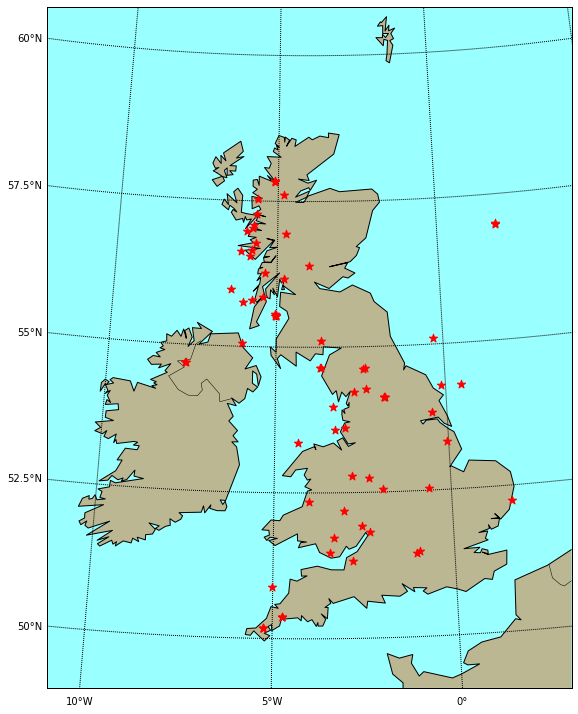

In [7]:
results_df=bgscat.bgs_events(lat0=54,lon0=-3,rad=500,date1='2021-12-01',date2='2022-12-27')
print("number of events =%s"%(len(results_df)))

fig=plt.figure(figsize=[20,10])
bgscat.plot_locs(results_df.lat,results_df.lon,fig=fig)
print(results_df)

   Unnamed: 0      lat          location      lon stat_code
0           0  58.4935    Upper Bighouse -3.90871      BIGH
1           1  51.1880          Parkgate -0.26500      BRDL
2           2  50.1867      Carnmenellis -5.22730      CCA1
3           3  55.0828        Cushendall -6.11060      CLGH
4           4  52.7385  Charnwood Forest -1.30760       CWF


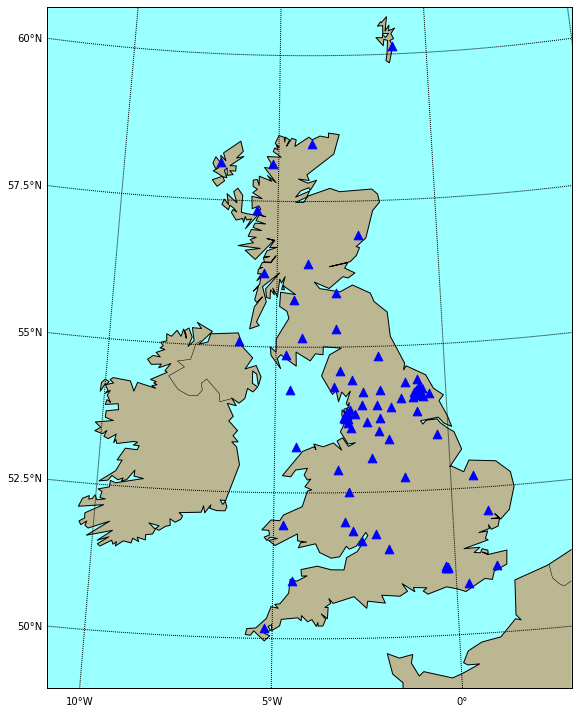

In [15]:
stations=pd.read_csv('../data/Station_book.csv')
print(stations.head())

fig=plt.figure(figsize=[20,10])
bgscat.plot_locs(stations.lat,stations.lon,fig=fig,marker='^',c='b')
plt.show()

In [17]:
stations=stations.set_index(['stat_code'])
AQ=stations[47:56]
print(AQ.index)

for station in AQ.index:
    print(station)

Index(['AQ01', 'AQ02', 'AQ03', 'AQ04', 'AQ05', 'AQ06', 'AQ07', 'AQ09', 'AQ10'], dtype='object', name='stat_code')
AQ01
AQ02
AQ03
AQ04
AQ05
AQ06
AQ07
AQ09
AQ10


In [53]:
### Access BGS ftp site and downloads waveform data for AQ stations

ftp=FTP('seiswav.bgs.ac.uk',timeout=60)
ftp.login()

# For just the M1.1 event so far.  

time_stamp='2019-08-26T07:30:47.1'
ev_time=UTCDateTime(time_stamp)
ev_name='%04d%02d%02d%02d%02d%02d'%(ev_time.year,ev_time.month,ev_time.day,ev_time.hour,ev_time.minute,ev_time.second)
print(ev_name)

year=ev_time.year
jday=ev_time.julday

# Dataframe already created for AQ stations
#     for station in stations_53.index[:]:
for station in AQ.index[:]:
    if station[0]=='A':
        network='UR'
    else:
        network='GB'
        
    path='Data/mseed/%s/%s/%s'%(station,year,jday)
    if not os.path.exists(path):
        os.makedirs(path)

    for comp in ['HHE','HHN','HHZ']:
        
        file='%s.%s.00.%s.D.%s.%03d'%(network,station,comp,year,jday)

        infile='/%s/%s/%s.D/%s'%(year,station,comp,file)
        print(infile)
#         infile='/2019/%s/%02d/%02d/%s'%(station,ev_time.year,ev_time.month,file)
#         print(infile)
        outfile='%s/%s'%(path,file)
        print(outfile)
        if not os.path.exists(outfile):
            try:
                ftp.retrbinary('RETR %s'%(infile),open(outfile,'xb').write)
            except:
                pass
        else:
            pass

20190826073047
/2019/AQ01/HHE.D/UR.AQ01.00.HHE.D.2019.238
Data/mseed/2019/238/UR.AQ01.00.HHE.D.2019.238
/2019/AQ01/HHN.D/UR.AQ01.00.HHN.D.2019.238
Data/mseed/2019/238/UR.AQ01.00.HHN.D.2019.238
/2019/AQ01/HHZ.D/UR.AQ01.00.HHZ.D.2019.238
Data/mseed/2019/238/UR.AQ01.00.HHZ.D.2019.238
/2019/AQ02/HHE.D/UR.AQ02.00.HHE.D.2019.238
Data/mseed/2019/238/UR.AQ02.00.HHE.D.2019.238
/2019/AQ02/HHN.D/UR.AQ02.00.HHN.D.2019.238
Data/mseed/2019/238/UR.AQ02.00.HHN.D.2019.238
/2019/AQ02/HHZ.D/UR.AQ02.00.HHZ.D.2019.238
Data/mseed/2019/238/UR.AQ02.00.HHZ.D.2019.238
/2019/AQ03/HHE.D/UR.AQ03.00.HHE.D.2019.238
Data/mseed/2019/238/UR.AQ03.00.HHE.D.2019.238
/2019/AQ03/HHN.D/UR.AQ03.00.HHN.D.2019.238
Data/mseed/2019/238/UR.AQ03.00.HHN.D.2019.238
/2019/AQ03/HHZ.D/UR.AQ03.00.HHZ.D.2019.238
Data/mseed/2019/238/UR.AQ03.00.HHZ.D.2019.238
/2019/AQ04/HHE.D/UR.AQ04.00.HHE.D.2019.238
Data/mseed/2019/238/UR.AQ04.00.HHE.D.2019.238
/2019/AQ04/HHN.D/UR.AQ04.00.HHN.D.2019.238
Data/mseed/2019/238/UR.AQ04.00.HHN.D.2019.238
/2019/

In [24]:
### Not working, don't use.

ftp=FTP('seiswav.bgs.ac.uk',timeout=60)
ftp.login()

# For just the M1.1 event so far.  

time_stamp='2019-08-26T07:30:47.1'
ev_time=UTCDateTime(time_stamp)
ev_name='%04d%02d%02d%02d%02d%02d'%(ev_time.year,ev_time.month,ev_time.day,ev_time.hour,ev_time.minute,ev_time.second)
print(ev_name)

# Dataframe already created for AQ stations
#     for station in stations_53.index[:]:
for station in AQ.index[:]:

    path='Data/mseed/%s-%02d'%(ev_time.date,ev_time.hour)
    if not os.path.exists(path):
        os.makedirs(path)

    for comp in ['HHE','HHN','HHZ']:

        file='%s-%02d00-00M.%s__%s'%(str(ev_time.date),ev_time.hour,station,comp)
#         infile='/2019/%s/%02d/%02d/%s'%(station,ev_time.year,ev_time.month,file)
        infile='/2019/%s/%02d/%02d/%s'%(station,ev_time.year,ev_time.month,file)
        print(infile)
        outfile='%s/%s'%(path,file)
        print(outfile)
        if not os.path.exists(outfile):
            try:
                ftp.retrbinary('RETR %s'%(infile),open(outfile,'xb').write)
            except:
                pass
        else:
            pass


        try:
            st = read(outfile,format='mseed')
            st=st.merge()
    #         st=read('ftp://seiswav.bgs.ac.uk/AQ04/2018/10/2018-10-24-1300-00M.AQ04__HHE')
    #         st = read('input/blackpool/%s'%(file),format='mseed')
            print(st)
        except:
            print('not available')
            break

        for tr in st:
            network=tr.stats.network
            if network=="":
                network="UR"
            station=tr.stats.station
            channel=tr.stats.channel
            date=tr.stats.starttime

            resp_file='RESP/RESP.%s.%s.00.%s'%(network,station,channel)
            if not os.path.exists(resp_file):
                print('Response file could not be found')
                pass
            else:
                pre_filt = (0.2,0.5,49,50)
                seedresp = {'filename': resp_file, 'date':date, 'units': 'DIS'}
                tr.simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)

        st_cut=st.copy()
        st_cut=st_cut.slice(ev_time,ev_time+100)
    #     st_cut.plot()

        for tr in st_cut:
            tr_write(tr,'Data/%s'%(ev_name),ev_name,resp=False) 
ftp.quit()

20190826073047
/2019/AQ01/2019/08/2019-08-26-0700-00M.AQ01__HHE
Data/mseed/2019-08-26-07/2019-08-26-0700-00M.AQ01__HHE
not available
/2019/AQ02/2019/08/2019-08-26-0700-00M.AQ02__HHE
Data/mseed/2019-08-26-07/2019-08-26-0700-00M.AQ02__HHE
not available
/2019/AQ03/2019/08/2019-08-26-0700-00M.AQ03__HHE
Data/mseed/2019-08-26-07/2019-08-26-0700-00M.AQ03__HHE
not available
/2019/AQ04/2019/08/2019-08-26-0700-00M.AQ04__HHE
Data/mseed/2019-08-26-07/2019-08-26-0700-00M.AQ04__HHE
not available
/2019/AQ05/2019/08/2019-08-26-0700-00M.AQ05__HHE
Data/mseed/2019-08-26-07/2019-08-26-0700-00M.AQ05__HHE
not available
/2019/AQ06/2019/08/2019-08-26-0700-00M.AQ06__HHE
Data/mseed/2019-08-26-07/2019-08-26-0700-00M.AQ06__HHE
not available
/2019/AQ07/2019/08/2019-08-26-0700-00M.AQ07__HHE
Data/mseed/2019-08-26-07/2019-08-26-0700-00M.AQ07__HHE
not available
/2019/AQ09/2019/08/2019-08-26-0700-00M.AQ09__HHE
Data/mseed/2019-08-26-07/2019-08-26-0700-00M.AQ09__HHE
not available
/2019/AQ10/2019/08/2019-08-26-0700-00M.AQ

'221 Goodbye.'

In [44]:
for station in AQ.index[:]:
    if station[0]=='A':
        network='UR'
    else:
        network='GB'


UR
UR
UR
UR
UR
UR
UR
UR
UR


In [39]:
ftp=FTP('seiswav.bgs.ac.uk',timeout=60)
ftp.login()

# For just the M1.1 event so far.  

time_stamp='2019-08-26T07:30:47.1'
ev_time=UTCDateTime(time_stamp)
ev_name='%04d%02d%02d%02d%02d%02d'%(ev_time.year,ev_time.month,ev_time.day,ev_time.hour,ev_time.minute,ev_time.second)
print(ev_name)

# Dataframe already created for AQ stations
#     for station in stations_53.index[:]:


path='Data'
if not os.path.exists(path):
    os.makedirs(path)



file='UR.AQ01.00.HHE.D.2021.018'
filename=glob.glob()

filename='/2021/AQ01/HHE.D/%s'%(file)

infile=glob.glob(filename)

print(infile)
outfile='%s/%s'%(path,file)
print(outfile)
if not os.path.exists(outfile):
    try:
        ftp.retrbinary('RETR %s'%(infile),open(outfile,'xb').write)
    except:
        pass
else:
    pass

20190826073047


TypeError: glob() missing 1 required positional argument: 'pathname'

In [41]:
ftp.retrbinary()

drwxr-xr-x   96 ftp      ftp          4096 Dec 27  2020 2019
drwxr-xr-x   86 ftp      ftp          4096 Oct 13  2020 2020
drwxr-xr-x   85 ftp      ftp          4096 May 14  2021 2021
drwxr-xr-x   75 ftp      ftp          4096 Feb 09 10:30 2022
drwxrwxr-x    2 ftp      ftp         40960 May 17  2021 dataless
drwxrwxr-x   15 ftp      ftp          2048 Feb 01 01:00 events
drwxr-xr-x   99 ftp      ftp          4096 Oct 13  2020 pre2019


In [28]:
infile='/2021/AQ04/HHE.D/UR.AQ01.00.HHE.D.2021.002'
outfile='test'
ftp.retrbinary('RETR %s'%(infile),open(outfile,'xb').write)

error_perm: 550 Failed to open file.

In [25]:
st=read('ftp://seiswav.bgs.ac.uk/2021/AQ04/HHE.D/UR.AQ01.00.HHE.D.2021.002')

InvalidSchema: No connection adapters were found for 'ftp://seiswav.bgs.ac.uk/2021/AQ04/HHE.D/UR.AQ01.00.HHE.D.2021.002'